# TP 2 : Fouille d’itemsets fréquents et de règles d’association sous Python

IMT Atlantique – FIL A3  <br/>
Apprentissage Automatique  <br/>

Élève : Xavier Aleman  <br/>

## Objectifs :

MLxtend (pour machine learning extensions) est une bibliothèque logicielle développée par Sebastian Raschka, qui propose des méthodes d’extraction d’itemsets fréquents et de règles d’association basée sur Apriori. D’autres algorithmes plus sophistiqués sont aussi proposés.

Ce TP se déroule en deux parties : découverte de MLxtend via des exemples simples et application d’algorithmes de fouille d’itemsets sur des données de vente au détail en ligne.

### 1 Partie 1 : MLxtend pour la fouille d’itemsets

### 1.1 Installation

MLxtend est une bibliothèque Python qui implémente différentes méthodes pour l’apprentissage
machine. Parmi ces méthodes, on retrouve les algorithmes d’extraction d’itemsets fréquents, de maximaux fréquents et de règles d’association.

L’installation de cette bibliothèque se fait via [conda](http://rasbt.github.io/mlxtend/installation/), avec la commande suivante :

```bash
conda install mlxtend --channel conda-forge
```

L’utilisation de fonctionnalités de MLxtend commence par l’importation de ces trois librairies :

In [63]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules

###1.2 Importation et préparation des données

### 1.2.1 Données transactionnelles

Considérons, le dataset ci-dessous décrivant les caddies de supermarché.

In [64]:
dataset = [ ['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs'] ]

### 1.2.2 Transformation en tableau binaire

La méthode apriori de la librairie MLxtend prend en entrée un tableau binaire où sont recensés
la présence (codé True) ou l’absence (codée par False) des produits dans chaque caddie.

— L’objet TransactionEncoder permet de transformer un ensemble de données en un tableau binaire ;  <br/>
— Avec la méthode fit, le TransactionEncoder apprend les étiquettes uniques dans l’ensemble de données, et via la méthode de transformation, il transforme l’ensemble de données d’entrée (une liste de listes) en un tableau de booléens.

In [65]:
TB = TransactionEncoder()
TBA = TB.fit(dataset).transform(dataset)

Le résultat de cette étape est un tableau NumPy au format ndarray. Il est possible de transformer ce tableau en un dataframe grâce à Pandas :

In [66]:
import pandas as pd
df = pd.DataFrame (TBA, columns=TB.columns_)

### 1.3 Extraction d’itemsets fréquents et des maximaux

Pour extraire les itemsets fréquents il faut appliquer la fonction apriori() au dataframe et fixer la valeur du support minimum (dans notre cas, min support=0.5). Il est aussi possible de contraindre la taille des itemsets retournés avec le paramètre max len.

In [67]:
FI = apriori(df,min_support=0.5, use_colnames=True)

Les résultats sont stockés dans une structure de type ”pandas/DataFrame”.

In [68]:
type(FI)

pandas.core.frame.DataFrame

Elle est composée de 2 colonnes : le support et la description des itemsets.

In [69]:
print(FI.columns)

Index(['support', 'itemsets'], dtype='object')


Pour nos données et avec les paramètres ci-dessus, vous devez obtenir 11 itemsets fréquents suivants.

In [70]:
print(FI)

    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Onion, Eggs)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Onion, Eggs, Kidney Beans)


On souhaite à présent mesurer le temps d’exécution d’Apriori pour extraire les itemsets fréquents. Pour cela, nous allons utiliser la fonction magique ipython %timit, qui peut être utilisée pour chronométrer un morceau de code particulier (une seule instruction d’exécution ou une seule méthode).

> ##### Note
>
> Usage, in line mode :
>
> ``` python
> %timeit -n<N> -r<R> [-t|-c] -q -p<P> -o] statement
> ```

In [71]:
%timeit -n 100 -r 10 apriori(df, min_support=0.5)

4.78 ms ± 894 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


La librairie MLxtend propose d’autres algorithmes sophistiqués pour extraire les itemsets fréquents, comme l’algorithme fpgrowth.

##### Question

Appliquez l’algorithme fpgrowth pour extraire les itemsets fréquents, puis comparez les temps de calculs avec Apriori. Que pouvez-vous conclure ?

In [72]:
print('processing apriori')
%timeit -n 100 -r 10 apriori(df, min_support=0.5)
print('processing fpgrowth')
%timeit -n 100 -r 10 fpgrowth(df, min_support=0.5)

processing apriori
4.37 ms ± 832 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
processing fpgrowth
1.28 ms ± 124 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


Pour extraire les itemsets fréquents maximaux, il faut utiliser la fonction fpmax.

In [73]:
MFI = fpmax(df,min_support=0.5, use_colnames=True)
print(MFI)

   support                     itemsets
0      0.6         (Milk, Kidney Beans)
1      0.6  (Onion, Eggs, Kidney Beans)
2      0.6       (Yogurt, Kidney Beans)


### 1.4Extraction de règles d’association

La fonction association rules de MLxtend prend les dataframes des itemsets fréquents produits par les fonctions apriori(), fpgrowth() ou fpmax().

Pour limiter le nombres de règles extraites, la fonction permet de spécifier (1) la métrique d’intérêt (paramètre metric) et (2) le seuil correspondant (paramètre min threshold). Les mesures actuellement mises en œuvre sont la confiance (metric = ”confidence”) et le lift (metric = ”lift”).

Le code ci-dessous illustre un exemple d’extraction de règles d’association à partir de itemsets fréquents avec un niveau de confidence d’au moins 80% (min threshold=0.8).

In [74]:
AR = association_rules(FI,metric="confidence",min_threshold=0.8)

##### Question
Affichez pour chaque règle l’antécédent et son le conséquent.

In [75]:
print(AR[['antecedents', 'consequents']])

             antecedents           consequents
0                 (Eggs)        (Kidney Beans)
1         (Kidney Beans)                (Eggs)
2                (Onion)                (Eggs)
3                 (Milk)        (Kidney Beans)
4                (Onion)        (Kidney Beans)
5               (Yogurt)        (Kidney Beans)
6          (Onion, Eggs)        (Kidney Beans)
7  (Onion, Kidney Beans)                (Eggs)
8                (Onion)  (Eggs, Kidney Beans)


### 2 Partie 2 : Application à des données de vente en détail

Nous allons maintenant appliquer les différents algorithmes vus précédemment sur des données de vente en détail en ligne issu de la base retail. Le fichier ”retail dataset.csv ” est un fichier au format csv qui se présente sous la forme d’une base transactionnelle ou les transactions représentent des caddies de supermarché : chaque ligne correspond aux noms des produits.

### 2.1 Évaluation

Vous devez rendre un code python qui tourne sur netbook Jupyter + un mini rapport (format pdf) présentant le travail réalisé, les résultats obtenus et une analyse (intéressante) de ces résultats.

### 2.2 Travail à faire

1. Charger et transformer les données de façon à ce qu’elles soient reconnues comme des transactions. En pratique on construit un tableau de données binaires.  <br/>
Les instructions Python suivantes permettent de charger le jeu de données retail :

In [124]:
import pandas as pd
db = pd.read_csv('retail_dataset.csv',sep=',',header=0, keep_default_na=False)
#print(db.head())
import numpy as np
db_trans = [[val
            for val in transaction if val != '']
                for transaction in db.values]
#for x in db_trans[0:5]: print(f"{x}\n")

TDB = TransactionEncoder()
TDBA = TDB.fit(db_trans).transform(db_trans)
#print(TDB.columns_)
#print(TDBA.head())

dbf = pd.DataFrame(TDBA, columns=TDB.columns_)
print(dbf.head())

   Bagel  Bread  Cheese  Diaper   Eggs  Meat   Milk  Pencil  Wine
0  False   True    True    True   True  True  False    True  True
1  False   True    True    True  False  True   True    True  True
2  False  False    True   False   True  True   True   False  True
3  False  False    True   False   True  True   True   False  True
4  False  False   False   False  False  True  False    True  True


$T = \{t_1 , t_2 , ... , t_m\}$
2. Utiliser l’algorithme Apriori pour extraire les itemsets fréquents et les maximaux. Vous choisirez un support minimum de 3 %.  <br/>
— Que se passe t’il si on fait varier le seuil du support ?  <br/>
— Tracer une courbe montrant l’évolution du nombre d’itemsets extraits en fonction du support minimum.

In [154]:
DBAP = apriori(dbf,min_support=0.03, use_colnames=True)
print(DBAP)

      support                                   itemsets
0    0.425397                                    (Bagel)
1    0.504762                                    (Bread)
2    0.501587                                   (Cheese)
3    0.406349                                   (Diaper)
4    0.438095                                     (Eggs)
..        ...                                        ...
296  0.073016           (Milk, Cheese, Eggs, Meat, Wine)
297  0.044444         (Cheese, Eggs, Meat, Pencil, Wine)
298  0.038095         (Milk, Cheese, Eggs, Pencil, Wine)
299  0.034921         (Milk, Cheese, Meat, Pencil, Wine)
300  0.031746  (Milk, Cheese, Meat, Pencil, Bread, Wine)

[301 rows x 2 columns]


In [153]:
## Que se passe t’il si on fait varier le seuil du support ?
DBIS = [{'support': i,
        'results' :apriori(dbf,min_support=i, use_colnames=True)}
            for i in np.arange(0.01, 1.0, 0.01) ]
print(pd.DataFrame(data= {
    'support': [x['support'] for x in DBIS],
    'nb_of_itemsets': [len(x['results']) for x in DBIS]
}))


    support  nb_of_itemsets
0      0.01             422
1      0.02             360
2      0.03             301
3      0.04             254
4      0.05             209
..      ...             ...
94     0.95               0
95     0.96               0
96     0.97               0
97     0.98               0
98     0.99               0

[99 rows x 2 columns]


<AxesSubplot:xlabel='min_support', ylabel='nb_of_itemsets'>

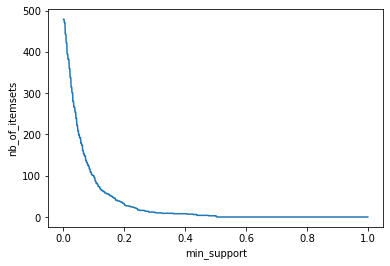

In [152]:
## Tracer une courbe montrant l’évolution du nombre de itemsets extraits en fonction du support minimum.
dataset2 = pd.DataFrame(data= {
    'min_support': [x['support'] for x in DBIS ],
    'nb_of_itemsets': [len(x['results']) for x in DBIS ]})

import seaborn as sns
sns.lineplot(data=dataset2 ,x='min_support', y="nb_of_itemsets")

3. Nous souhaitons pouvoir filtrer les itemsets selon la présence d’items ou d’un ensemble d’items.  <br/>
Par exemple, quels sont les itemsets qui contiennent le produit ’Eggs’ ? les produits {’Eggs’,’Meat’} ?

> ##### Note
> Plusieurs solutions s’offrent à vous pour la recherche d’itemsets répondant à des conditions de présence d’items.  <br/>
> Vous pouvez par exemple utiliser les opérateurs de comparaison de [pandas.Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html).

In [80]:
def val_to_column_name(itemsets: pd.DataFrame):
    col_names = itemsets.columns.tolist()
    transactions = itemsets.values.tolist()

    return [[col_name
            for val, col_name in zip(transaction, col_names) if val != False]
                for transaction in transactions]

def filter_itemsets(products: list, itemsets: pd.DataFrame):
    query = '&'.join([f'{column}==True' for column in set(products)])
    res = itemsets.query(query)

    return res, val_to_column_name(res)

itemsets_with_eggs = filter_itemsets(['Eggs'], dbf)[1]
itemsets_with_eggs_and_meat = filter_itemsets(['Eggs', 'Meat'], dbf)[1]

In [81]:
print(f"Number of itemsets with eggs : {len(itemsets_with_eggs)}")
for x in itemsets_with_eggs[0:3]: print(x)
print("...")
for x in itemsets_with_eggs[-3:]: print(x)

Itemsets with eggs : 138
['Bread', 'Cheese', 'Diaper', 'Eggs', 'Meat', 'Pencil', 'Wine']
['Cheese', 'Eggs', 'Meat', 'Milk', 'Wine']
['Cheese', 'Eggs', 'Meat', 'Milk', 'Wine']
...
['Bread', 'Cheese', 'Eggs']
['Bread', 'Cheese', 'Diaper', 'Eggs', 'Meat', 'Pencil', 'Wine']
['Bagel', 'Bread', 'Eggs', 'Meat', 'Wine']


In [86]:
print(f"Number of itemsets with eggs and meat : {len(itemsets_with_eggs_and_meat)}")
for x in itemsets_with_eggs_and_meat[0:3]: print(x)
print("...")
for x in itemsets_with_eggs_and_meat[-3:]: print(x)

Number of itemsets with eggs and meat : 84
['Bread', 'Cheese', 'Diaper', 'Eggs', 'Meat', 'Pencil', 'Wine']
['Cheese', 'Eggs', 'Meat', 'Milk', 'Wine']
['Cheese', 'Eggs', 'Meat', 'Milk', 'Wine']
...
['Bagel', 'Bread', 'Eggs', 'Meat', 'Milk', 'Pencil', 'Wine']
['Bread', 'Cheese', 'Diaper', 'Eggs', 'Meat', 'Pencil', 'Wine']
['Bagel', 'Bread', 'Eggs', 'Meat', 'Wine']


4. Utiliser l’algorithme Apriori pour extraire les règles d’association à partir des itemsets fréquents et des itemsets maximaux. Vous choisirez une confiance minimale de 75 %.  <br/>
Extraire les règles ayant pour conséquents ’Chesse’.

> ##### Note
> La fonction association_rules() renvoie un objet de type pandas.dataframe contenant les différentes règles d’association, chacune décrite par différentes caractéristiques qui sont l’antécédent, le conséquent, et 7 indicateurs numériques d’évaluation des règles.  <br/>
> Il faudra adapter l’affichage pour disposer que des informations liées aux mesures support, lift et la confidence.

In [164]:
DFAP = apriori(dbf, min_support=0.03, use_colnames=True)
#print(DFAP)

DFAPAR = association_rules(DFAP,metric="confidence",min_threshold=0.75)
#print(DFAPAR)

DFAPAR = DFAPAR[DFAPAR['consequents'] == {'Cheese'}][['antecedents', 'consequents','support', 'lift', 'confidence']]
print(DFAPAR)

                      antecedents consequents   support      lift  confidence
1                    (Meat, Eggs)    (Cheese)  0.215873  1.613924    0.809524
2                    (Milk, Eggs)    (Cheese)  0.196825  1.605293    0.805195
3                    (Milk, Meat)    (Cheese)  0.203175  1.657077    0.831169
10             (Milk, Meat, Eggs)    (Cheese)  0.152381  1.708861    0.857143
11             (Milk, Eggs, Wine)    (Cheese)  0.104762  1.530026    0.767442
13             (Milk, Meat, Wine)    (Cheese)  0.101587  1.594937    0.800000
18    (Meat, Eggs, Diaper, Bagel)    (Cheese)  0.038095  1.495253    0.750000
20  (Pencil, Wine, Diaper, Bagel)    (Cheese)  0.031746  1.533593    0.769231
31       (Milk, Meat, Eggs, Wine)    (Cheese)  0.073016  1.581187    0.793103


5. Compléter l’analyse des différentes règles d’association extraites via des graphiques permettant d’étudier la corrélation entre les trois mesures (lift, confiance et support) d’évaluation des règles.

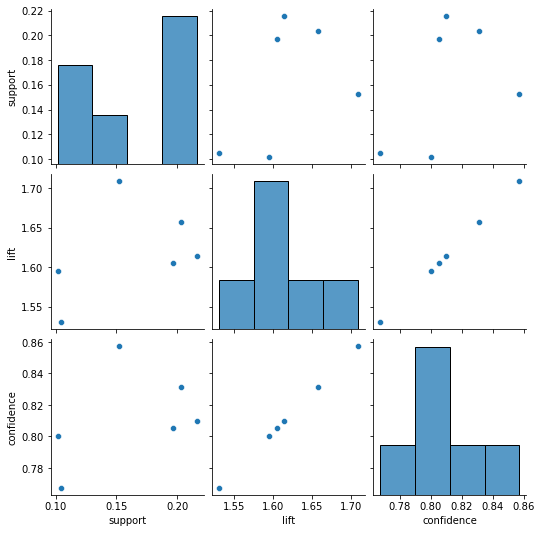

In [84]:
sns.pairplot(data = DFAPAR)

### 3 Références
1. [MLxtend : machine learning extensions](http://rasbt.github.io/mlxtend/)
2. [Introduction to Market Basket Analysis in Python](https://pbpython.com/market-basket-analysis.html)
3. [Association Rule Mining via Apriori Algorithm in Python](https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/)
4. [Documentation Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api)
5. [Documentation MLxtend](http://rasbt.github.io/mlxtend)




